**Name : Amarade Punfueng**

# **Question 1 [KNN Regressor, 5+5=10 Marks]**

## I Implement a KNN regressor using the scikit-learn conventations, i.e., in a class with the following skeleton ##

In [1]:
from scipy.spatial import KDTree
import numpy as np
import matplotlib.pyplot as plt
#Using the skeleton from Activity 1.1
class KnnRegressor:
    def __init__(self, k):
        self.k = k

    def fit(self, x, y):
        self.y_train_ = y
        self.x_train_kdtree_ = KDTree(x)
        return self

    def predict(self, x):
        _, neighbours = self.x_train_kdtree_.query(x, k=self.k)
        neighbours = neighbours.reshape(len(x), self.k)
        #Instead of the return mode of the array
        #Change to return the mean of the array because it is KNN regressor, not KNN classifier
        Mean = []
        for i in range(len(self.y_train_[neighbours])):
            y_mean = np.mean(self.y_train_[neighbours][i])
            Mean.append(y_mean)
        return Mean

## II To test your implementation, load the datasets diabetes and california housing through the functions load diabetes and fetch california housing, both of which are available in the module sklearn.datasets. 

For both datasets, perform a training/test split (using a fraction of 0.6 of the data as training data), fit your KNN regressor to the training portion (using some guess for a good value of k), and report the training and test errors.

In [2]:
#Using the code from Activity 1.1
def train_test_split_activity(x, y, train_size=0.6, random_state=None):
    RNG = np.random.default_rng(random_state)
    N = len(x)
    N_train = round(N*train_size)
    idx_train = RNG.choice(N, N_train, replace=False)
    idx_test = np.setdiff1d(np.arange(N), idx_train)
    RNG.shuffle(idx_test)
    #Assign the random index to the X_train/test and Y_train/test   
    x_train = x[idx_train]
    x_test = x[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    return x_train,x_test,y_train,y_test

Load the datasets diabetes and california housing through the functions load diabetes and fetch california housing

In [3]:
#Load the diabetes and California dataset
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
diabetes = load_diabetes()
california_housing = fetch_california_housing()

For both datasets, perform a training/test split (using a fraction of 0.6 of the data as training data)

In [4]:
#Split the dataset to be 0.6 of train size
x_train, x_test, y_train, y_test = train_test_split_activity(diabetes.data, diabetes.target, train_size=0.6, random_state=0)

Fit your KNN regressor to the training portion (using some guess for a good value of k), and report the training and test errors.

In [5]:
#Select k= 5 for KnnRegressor for guessing good value of K
knn = KnnRegressor(5)
knn.fit(x_train, y_train)
y_hat_test = knn.predict(x_test)
y_hat_train = knn.predict(x_train)

In [6]:
def error_rate(y, y_hat):
    rmse = np.sqrt(np.mean((y - y_hat)**2))
    return rmse
#Report the training and testing error 
#Using RMSE to understand the error because the RMSE have the same metric with Y
print("Diabetes training error (RMSE):" , error_rate(y_train, y_hat_train))
print("Diabetes testing error (RMSE):" , error_rate(y_test, y_hat_test))

Diabetes training error (RMSE): 53.13487999137772
Diabetes testing error (RMSE): 58.690674337898756


California_housing 

In [7]:
#Split the dataset to be 0.6 of train size
x_train, x_test, y_train, y_test = train_test_split_activity(california_housing.data, california_housing.target, train_size=0.6, random_state=0)
#Select k= 5 for KnnRegressor for guessing good value of K
knn = KnnRegressor(5)
knn.fit(x_train, y_train)
y_hat_train = knn.predict(x_train)
y_hat_test = knn.predict(x_test)

In [8]:
#Report the training and testing error
#Using RMSE to understand the error because the RMSE have the same metric with Y
print("California_housing  training error (RMSE):" , error_rate(y_train, y_hat_train))
print("California_housing  testing error (RMSE):" , error_rate(y_test, y_hat_test))

California_housing  training error (RMSE): 0.8764807016246337
California_housing  testing error (RMSE): 1.0827492069344993




---



# **Question 2 [L-fold Cross Validation, 5+5+5=15 Marks]**

## I Implement a L-Fold Cross Validation (CV) scheme using the scikit-learn convention for data splitters, i.e., using the following skeleton.


In [9]:
#Using skeleton from Activity 1.2
class LFold:
    def __init__(self, reps, random_state=0):
        self.reps = reps
        self.random_state = random_state
        self.RNG = np.random.default_rng(self.random_state)

    def get_n_splits(self):
        return self.reps
#Refer https://scikit-learn.org/stable/modules/cross_validation.html
    def split(self, x, y=None, groups=None):        
        all_data = len(x)
        reps = self.reps
        #fold_size = number of dataset/reps
        fold_size = all_data // reps
        #Place the index of dataset in placeholder list
        placeholder = []
        for i in range(all_data):
            placeholder.append(i)
        #Shuffle index in placeholder Example [4, 6, 7, 2,0, 3, 5, 10,5, 10, 9]
        self.RNG.shuffle(placeholder)
        #Create dataset from each_fold
        each_fold = []

        #Find modulo by All data % reps
        modulo = all_data % reps
        for i in range(reps):
          #Modulo still more than 1
            if modulo >0 :
                #identify number of test size array            
                test_size = all_data // reps+1
                #Append the test size array into each_fold list
                each_fold.append(placeholder[i*test_size:(i+1)*test_size])
                #Reduce the modulo
                modulo = modulo-1
            else:
                each_fold.append(placeholder[i*fold_size:(i+1)*fold_size])
        #Example Result [[4, 6, 7, 2], [0, 3, 5, 10], [5, 10, 9]]        

        for fold_idx in range(reps):
            #identify test set by index 0 ->1 -> 2 and so on
            test_idx = each_fold[fold_idx]
            #Identify train set by exclude the test set
            train_idx = np.concatenate(each_fold[:fold_idx] + each_fold[fold_idx+1:])
            yield train_idx, test_idx


Test your implementation for correctness by running a simple example like the following.

In [10]:
for idx_train, idx_test in LFold(5).split(list(range(20))):
    print(idx_train, idx_test)

[13 16  3 11 10  8  0 12  7  5 18 17 14  9  1 15] [4, 19, 6, 2]
[ 4 19  6  2 10  8  0 12  7  5 18 17 14  9  1 15] [13, 16, 3, 11]
[ 4 19  6  2 13 16  3 11  7  5 18 17 14  9  1 15] [10, 8, 0, 12]
[ 4 19  6  2 13 16  3 11 10  8  0 12 14  9  1 15] [7, 5, 18, 17]
[ 4 19  6  2 13 16  3 11 10  8  0 12  7  5 18 17] [14, 9, 1, 15]


## II For both datasets from Question 1, use your L-fold CV implementation to systematically test

the effect of the KNN parameter K by testing all options from 1 to 50 and, for each K, instead of only performing a single training/test split run your L-Fold CV. For each K compute the mean and standard mean squared error (training and test) across the L folds and report the K for which you found the best test performance (for both datasets)


In [11]:
from sklearn.metrics import mean_squared_error

def test_k_values(dataset, k_values, lcv):
    #Create empty list for mean of mse and std of mse 
    mean_MSE_train = []
    mean_MSE_test = []
    std_MSE_train = []
    std_MSE_test = []

    for train_idx, test_idx in lcv.split(dataset.data):
        MSE_train_folds = []
        MSE_test_folds = []
        for k in k_values:
            knn = KnnRegressor(k)
            knn.fit(dataset.data[train_idx], dataset.target[train_idx])
            #Predict train data
            y_pred_train = knn.predict(dataset.data[train_idx])
            #Predict test data
            y_pred_test = knn.predict(dataset.data[test_idx])
            #Calculate mse for each fold and append mse to list
            MSE_train_folds.append(np.mean(mean_squared_error(dataset.target[train_idx], y_pred_train)))
            MSE_test_folds.append(np.mean(mean_squared_error(dataset.target[test_idx], y_pred_test)))        

      #Calculate mean and std of mse for each k parameter of KNN
        mean_MSE_train.append(np.mean(MSE_train_folds))
        mean_MSE_test.append(np.mean(MSE_test_folds))
        std_MSE_train.append(np.std(MSE_train_folds))
        std_MSE_test.append(np.std(MSE_test_folds))

    return mean_MSE_train, mean_MSE_test, std_MSE_train, std_MSE_test

#Select number of Fold as 5
lcv = LFold(reps=5, random_state=0)
#Assign k_value from 1 to 50
k_values = np.arange(1, 51)

Compute the mean and standard mean squared error (training and test) across the L folds and report the K for which you found the best test performance (for both datasets)

In [12]:
meanofmse_train_diabetes, meanofmse_test_diabetes,stdofmse_train_diabetes, stdofmse_test_diabetes= test_k_values(diabetes, k_values, lcv)
#Lowest value of mean and std of MSE should be the best k value
best_k_diabetes = k_values[np.argmin(meanofmse_test_diabetes)]
best_ks_diabetes = k_values[np.argmin(stdofmse_test_diabetes)]
print(f"Best k value for diabetes dataset: {best_k_diabetes}")
print(f"Test mean of mse for best k value: {meanofmse_test_diabetes[np.argmin(meanofmse_test_diabetes)]}\n")
print(f"Best k value for diabetes dataset: {best_ks_diabetes}")
print(f"Test std of mse for best k value: {stdofmse_test_diabetes[np.argmin(stdofmse_test_diabetes)]}")

Best k value for diabetes dataset: 4
Test mean of mse for best k value: 3187.10963322426

Best k value for diabetes dataset: 4
Test std of mse for best k value: 376.95344120023015


In [13]:
%%time
meanofmse_train_housing, meanofmse_test_housing, stdodmse_train_housing,stdodmse_test_housing= test_k_values(california_housing, k_values, lcv)
best_k_housing = k_values[np.argmin(meanofmse_test_housing)]
best_ks_housing = k_values[np.argmin(stdodmse_test_housing)]
#Lowest value of mean and std of MSE should be the best k value
#As the california_housing dataset is very large, The processing time take around 1 hour in Google Colab environment.
#It takes a lot longer in default Jupyter notebook environment
print(f"Best k value for california housing dataset: {best_k_housing}")
print(f"Test mean of mse for best k value: {meanofmse_test_housing[np.argmin(meanofmse_test_housing)]}")
print(f"Best k value for california dataset: {best_ks_housing}")
print(f"Test std of mse for best k value: {stdodmse_test_housing[np.argmin(stdodmse_test_housing)]}\n")

Best k value for california housing dataset: 5
Test mean of mse for best k value: 1.1658218557918498
Best k value for california dataset: 1
Test std of mse for best k value: 0.06289946756843823

CPU times: total: 1h 8min 18s
Wall time: 2h 2min 57s


## III For both datasets, plot the mean training and test errors against the choice of K with error bars (using the standard error of the mean). 
You can compute the standard error of the means as
 
$ste = \frac{1.96S}{\sqrt{L}}$

where S is the sample standard deviation of the error across the L folds. Based on this plot, comment on

– The effect of the parameter K. For both datasets, identify regions of overfitting and underfitting for the KNN model.

In [14]:
from sklearn.metrics import mean_squared_error
def plot_graph(dataset,fold,k):
  #Select Lfold and k value
    lcv = LFold(reps=fold,  random_state=0)  
    k_values = k
  
    #Using similar skeleton from Activity 1.2
    mse_train = np.zeros((len(k_values), lcv.get_n_splits()))
    mse_test = np.zeros((len(k_values), lcv.get_n_splits()))

    for j, (idx_train, idx_test) in enumerate(lcv.split(dataset.data)):
        for i, k in enumerate(k_values):
            knn = KnnRegressor(k)
            knn.fit(dataset.data[idx_train], dataset.target[idx_train])
            y_pred_train = knn.predict(dataset.data[idx_train])
            y_pred_test = knn.predict(dataset.data[idx_test])
            #Calculate MSE for train and test error
            mse_train[i, j] = mean_squared_error(dataset.target[idx_train], y_pred_train)
            mse_test[i, j] = mean_squared_error(dataset.target[idx_test], y_pred_test)

    mean_train = np.mean(mse_train, axis=1)
    mean_test = np.mean(mse_test, axis=1)
    #Compute standard error of the mean
    ste_train = 1.96 * np.std(mse_train, axis=1) / np.sqrt(lcv.get_n_splits())
    ste_test = 1.96 * np.std(mse_test, axis=1) / np.sqrt(lcv.get_n_splits())
    #Plot line graph
    plt.errorbar(k_values, mean_train, yerr=ste_train, label='train')
    plt.errorbar(k_values, mean_test, yerr=ste_test, label='test')
    plt.xlabel('K')
    plt.ylabel('Mean of the mean squared error')
    plt.legend()
    plt.show()

Diabetes: The effect of the parameter K

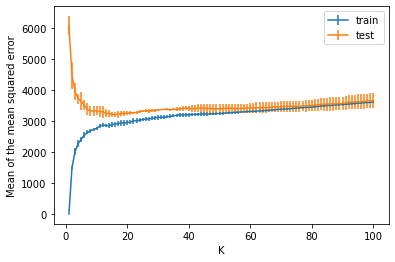

In [15]:
#Fold=4 with k = 1-100
plot_graph(diabetes,4,np.arange(1, 101))

The overfitting region is between 1 and 13. Because variance is high and training error is low

The underfitting region is when both errors are high. K optimal is likely around 15-20. The underfitting phenomena start after k = 20 when both errors start to increasing again.

california_housing

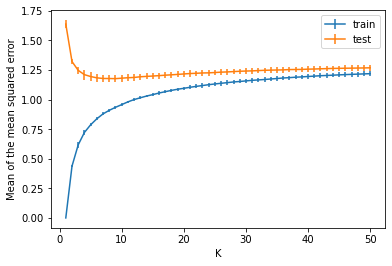

CPU times: total: 20min 41s
Wall time: 37min 5s


In [16]:
%%time
#Fold=2 with k = 1-50
#As the california_housing dataset is very large, Using k = 1-100 might take more than 1 hour in the Google Colab environment.
#It takes a lot longer in the default Jupyter notebook environment, so I chose k = 1-50 as the graph does not much difference
plot_graph(california_housing,2,np.arange(1, 51))

The overfitting region is between 1 and 20. Because variance is high and training error is low.

The underfitting region is when both errors are high. It doesn't appear in max_k at 50. Both errors stabilize after k = 25, and max_k = 50 is not large enough to let the model show an underfitted region like the Diabetes dataset.

The effect of the parameter L of the CV procedure.

Diabetes

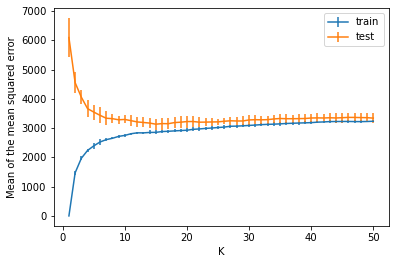

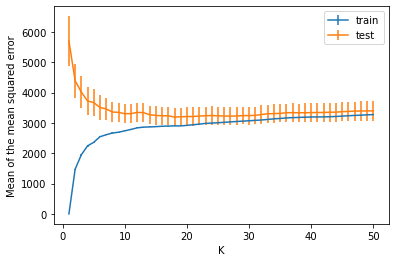

In [17]:
#k=1-50 with Fold=5 and Fold = 20
plot_graph(diabetes,5,np.arange(1, 51))
plot_graph(diabetes,20,np.arange(1, 51))

The effect of parameter L in LFold, It can be seen that the graph trend is similar to the effect of parameter K. The main difference is the longer error bar. Because the data is split into more folds, resulting in a smaller training set in each fold. The test set is also larger, which leads to higher variance in test error. As the training set is smaller, the error bar will be smaller because of the lower variance in training error.

california_housing The effect of the parameter L

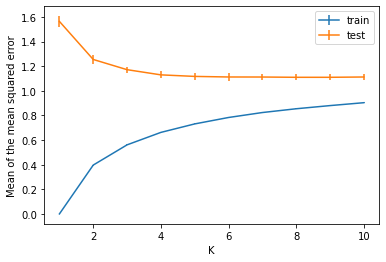

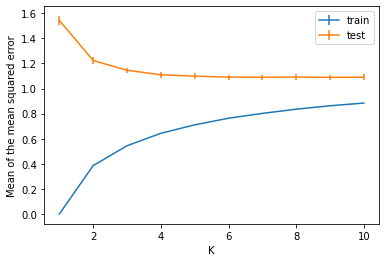

CPU times: total: 19min 50s
Wall time: 31min 41s


In [18]:
%%time
#k= 1-10 with Fold=5 and Fold=20
plot_graph(california_housing,5,np.arange(1, 11))
plot_graph(california_housing,20,np.arange(1, 11))

The effect of parameter L in the above graph. It is still similar to the Diabetes graph. It can be seen that the graph trend is similar to the effect of parameter K. The error bar might be hard to see because it increases or decreases by decimal in training and test error.
But the main difference is still the longer error bar. Because the data is split into more folds, resulting in a smaller training set in each fold. The test set is also larger, which leads to higher variance in test error. As the training set is smaller, the error bar will be smaller because of the lower variance in training error.

Another thing that occurs in the California housing dataset is processing time. It can be seen that increasing Parameter L in a large dataset. The processing time will increase by a lot as well.



---



# **Question 3 [Automatic Model Selection, 5 + 5 = 10 Marks]**


## I Implement a version of the KNN regressor that automatically chooses an appropriate value of K from a list of options by performing an internal cross-validation on the training set at fitting time. Us usually, use the scikit-learn paradigm, i.e., use the following template

In [19]:
class KnnRegressorCV:
    def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
        self.ks = ks
        self.cv = cv
    def fit(self, x, y=None):
        lcv = self.cv
        ks = self.ks
        mse_test = []
        best_k_inner_fold = []        
        #Outer_fold index
        outer_index_train = []
        outer_index_test = []    
        for train_idx, test_idx in lcv.split(x.data):
            outer_index_train.append(train_idx)
            outer_index_test.append(np.array(test_idx))             
        #Inner_fold index
        for i in range(len(outer_index_train)):
            inner_index_train = []
            inner_index_test = []
            for train_idx, test_idx in lcv.split(outer_index_train[i]):
                inner_index_train.append(train_idx)
                inner_index_test.append(test_idx)
            #Each inner fold      
            find_best_k = []
            for i in range(len(inner_index_train)):
                MSE_inner_loop = []
                #Each ks Example 1-20
                for k in ks:
                    knn = KnnRegressor(k)
                    knn.fit(x.data[inner_index_train[i]], x.target[inner_index_train[i]])
                    y_pred_test = knn.predict(x.data[inner_index_test[i]])
                    #Calculate mse for each inner_fold   
                    MSE_inner_loop.append(np.mean(mean_squared_error(x.target[inner_index_test[i]], y_pred_test)))

                #Find best K value by Min of MSE each inner_fold and Best k value of each inner_foldw
                find_best_k.append(ks[np.argmin(MSE_inner_loop)])
            #Best k value of inner_fold
            best_k_inner_fold.append(ks[np.argmin(find_best_k)])
            knn = KnnRegressor(ks[np.argmin(find_best_k)])
            knn.fit(x.data[outer_index_train[i]], x.target[outer_index_train[i]])
            y_pred_test = knn.predict(x.data[outer_index_test[i]])
            mse_test.append(np.mean(mean_squared_error(x.target[outer_index_test[i]], y_pred_test)))           


        #Calculate best k of inner fold by Mean        
        mean_k_inner = np.mean(best_k_inner_fold)
        #Report (mean) k value at inner fold
        print(f"Best (mean) k value at inner loop :" + str(mean_k_inner))
        self.best_k_outer_loop = best_k_inner_fold[np.argmin(mse_test)]
        #Report Best k value at outer fold
        print(f"Best k value at outer loop :" + str(self.best_k_outer_loop))
        #Fit model based on best k value of outer fold                       
        self.model = KnnRegressor(k=self.best_k_outer_loop).fit(x.data[outer_index_train[i]], x.target[outer_index_train[i]])
        return self


    def predict(self, X):
        return self.model.predict(X)

## II For both datasets from the previous questions, test your KNN regressor with internal CV byusing either a outer single train/test-split or, ideally, with an outer cross-validation 
(resulting in a so-called nested cross-validation scheme). Report on the (mean) k value that is chosen
by the KNN regressor with internal cross-validation and whether it corresponds to the best
k-value with respect to the outer test sets. Comment on what factors determine whether the
internal cross-validation procedure is successful in approximately selecting the best model.


In [20]:
knn_cv = KnnRegressorCV()
knn_cv.fit(diabetes)

Best (mean) k value at inner loop :2.6
Best k value at outer loop :4


In [21]:
knn_cv = KnnRegressorCV()
knn_cv.fit(california_housing)

Best (mean) k value at inner loop :2.4
Best k value at outer loop :5


**Factors determine whether the
internal cross-validation procedure is successful in approximately selecting the best model**

Depending on the number of folds, more folds are more accurate, and the choice of ks, as in the above function, only 1-20 have to choose the best range to find the best model. But the tradeoff of increasing the number of folds and choice of ks range is to increase the processing time to run the model. Lastly, The size of the dataset matters. A bigger dataset should give us more choices to run the internal cross-validation procedure. 





---



# **Question 4 [Bayes Rule, 5+5=10 Marks]**
Recall the simple example from Appendix A of Module 1. Suppose we have one red, one blue, and one yellow box with the following content:

• In the red box we have 3 apples and 5 oranges,

• in the blue box we have 4 apples and 4 oranges, and 

• in the yellow box we have 1 apples and 1 orange.


Now suppose we selected one of the boxes uniformly at random and then, in a second step, picked a fruit from it, again uniformly at random.


## I Implement a Python function that simulates the above experiment (using a suitable method of a numpy random number generator obtained via numpy.random.get default rng).

In [22]:
def fruit_experiment(number_of_experiment):
  #Create RNG parameter based on select seed
    ans1 = []
    ans2 = []
    for i in range(number_of_experiment):
        rng = np.random.default_rng(seed=i)
        #Create box_list
        box = ('red','blue','yellow')
        #Create Fruit in each box
        item_in_box =[['apple','apple','apple','oranges','oranges','oranges','oranges','oranges'],['apple','apple','apple','apple','oranges','oranges','oranges','oranges'],['apple','orange']]

        #Select one of the boxes uniformly
        select_box= rng.integers(len(item_in_box)-1, size=1)
        select_box= select_box.tolist()
        ans1.append(box[select_box[0]])

        #Select one of the fruit in above box uniformly
        picked_fruit = len(item_in_box[select_box[0]])-1
        picked_fruit= rng.integers(picked_fruit, size=1)
        picked_fruit = picked_fruit.tolist()
        ans2.append(item_in_box[select_box[0]][picked_fruit[0]])

    return print(f"Box color: {ans1}  ",f"Picked fruit: {ans2}")

fruit_experiment(6)

Box color: ['blue', 'red', 'blue', 'blue', 'blue', 'blue']   Picked fruit: ['oranges', 'oranges', 'apple', 'apple', 'oranges', 'oranges']


## II Answer the following question by a formal derivation: If the picked fruit is an apple, what is the probability that it was picked from the yellow box?

$P(Red),P(Yellow),P(Blue) = \frac{1}{3}$

$P(Apple|Red) = \frac{3}{8}$

$P(Apple|Blue) = \frac{1}{2}$

$P(Apple|Yellow)= \frac{1}{2}$


$P(Yellow|Apple) = \frac{P(Yellow)* P(Apple|Yellow)}{p(Yellow)* P(Apple|Yellow) + p(Red)* P(Apple|Red) +Pp(Apple|Blue) * P(Blue)}$


$p(Yellow|Apple) = \frac{\frac{1}{3}*\frac{1}{2}}
{(\frac{1}{3}* \frac{1}{2}) + (\frac{1}{3}
* \frac{3}{8}) + (\frac{1}{3}
* \frac{1}{2})} = \frac{4}{11}$



---



# **Question 5 [Ridge Regression, 10+5+5=20 Marks]**

## I Derive the weight update steps of stochastic gradient descent (SGD) for linear regression with L2 regularisation norm or a system of linear equations 
that uniquely determine the
minimum of the regularised error function. Give this derivation with enough explanation in a
markdown cell (ideally using Latex for readable math typesetting). The starting point is the
definition of the regularised error function and the end result is either the weight update step
for this function in (stochastic) gradient descent or a system of linear equations described in
matrix/vector notation. In both cases, you have to derive the gradient as an intermediate
step

**Answer**

Refer to :https://www.youtube.com/watch?v=skOcLw_fXDs&list=LL&index=1&t=412s&ab_channel=EndlessEngineering

and https://sebastianraschka.com/faq/docs/linear-gradient-derivative.html

For linear regression with L2 regularization, we want to minimize the regularized error function:

$E(\mathbf{w}) = \mathbf{X} \mathbf{w}  - \mathbf{Y})^T(\mathbf{Xw} - \mathbf{Y}) + {\lambda} \mathbf{w}^T \mathbf{w}$ 

By second term ${\lambda} \mathbf{w}^T \mathbf{w}$ is L2 regularization

$\mathbf{w}$ is the vector of weights
$\mathbf{X}$ is the matrix of input features 

$\mathbf{Y}$ is the vector of target values

$\lambda$ is the regularization parameter.

Then derivative respect to w set equal to 0

$0 = 2 \mathbf{X}^T (\mathbf{Xw}  - \mathbf{Y}) + {\lambda} 2\mathbf{w}$

Divide by 2 and then multiply $\mathbf{X}^T$ in to bracket

$0 = \mathbf{X}^T (\mathbf{Xw}  - \mathbf{Y}) + {\lambda} \mathbf{w}$

$0 = \mathbf{X}^T \mathbf{Xw}  - \mathbf{X}^T \mathbf{Y} + {\lambda} \mathbf{w}$

Move $-\mathbf{X}^T \mathbf{Y} $ to other side and factor out the W

$\mathbf{X}^T \mathbf{Yy} = (\mathbf{X}^T \mathbf{X}  + {\lambda}\mathbf{I}) \mathbf{w}$

Using $\mathbf{A}^{-1}\mathbf{B} = \mathbf{X}$ to solve for W


$\mathbf{w} = (\mathbf{X}^T \mathbf{X}  + {\lambda}\mathbf{I})^{-1} \mathbf{X}^T\mathbf{Y}$



---



Using the stochastic gradient descent (SGD) to minimize this function by iteratively updating the weights in the direction of the negative gradient of the objective function with respect to the weights. The weight update rule for SGD can be derived as follows:

Select a random sample of the data and calculate the gradient of the regularized error function with respect to the weights for that datapoint:



$\nabla_{} E\mathbf{w}_{\text{n}} = (\mathbf{X}^T \mathbf{X}{\text{n}}  + {\lambda}\mathbf{I})^{-1} \mathbf{X}^T\mathbf{Y}{\text{n}}$


Then Update the weights by subtracting the gradient of the regularized error function with respect to the weights for the datapoint multiplied by the learning rate $\eta$:


$\mathbf{w}^t = \mathbf{w}^{t-1} - \eta^t \nabla_{\mathbf{w}} E_{\text{n}}(\mathbf{w}^{t-1})$

$\mathbf{t}$  is iteration number

$\eta^t$ is learning rate parameter

To summarize the algorithm

Start at the parameter $\mathbf{w}^0  ,  \mathbf{t}=1$
Continue the process when the condition is not met do:

*   Random select datapoint ( $\mathbf{X}{\text{n}},\mathbf{Y}{\text{n}})$
*   $\mathbf{w}^t = \mathbf{w}^{t-1} - \eta^t \nabla_{\mathbf{w}} E_{\text{n}}(\mathbf{w}^{t-1})$
*   Update iteration $\mathbf{t}= \mathbf{t}+1$

Stop condition

*   Reached assign max iteration
*   or the $\mathbf{w}^t - \mathbf{w}^{t-1}  < \epsilon$








## II Using the analytically derived gradient from Step I
implement either a direct or a (stochastic)
gradient descent algorithm for Ridge Regression (use again the usual template with init ,
fit, and predict methods. You cannot use any import from sklearn.linear model for this
task.

In [23]:
#Refer https://stackoverflow.com/questions/64744455/error-in-ridge-regression-gradient-descent-python
#https://machinelearningcompass.com/machine_learning_models/ridge_regression/ https://stackoverflow.com/questions/65909753/gradient-descent-for-ridge-regression

#Using similar skeleton from Activity 2.1 to implement direct gradient descent algorithm for Ridge Regression
class GDRidgeRegression:

    def __init__(self, eta=0.01, tau_max=1000, epsilon=0.00001,alpha =0.01):
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.alpha = alpha
        
    def fit(self, x, y):
        # initial weight matrix with p columns and as many rows as we can have iterations
        # we will store each intermediate weight vector in one row of this matrix
        n, p = x.shape
        self.w_ = np.zeros(shape=(self.tau_max+1, p))

        for tau in range(1, self.tau_max+1):
            grad = x.T.dot(x.dot(self.w_[tau-1])-y)/n + self.alpha*self.w_[tau-1] #self.alpha*self.w_[tau-1] = L2 term
            self.w_[tau] = self.w_[tau-1] - self.eta*grad
            # stopping criterion
            if np.linalg.norm(self.w_[tau]-self.w_[tau-1]) < self.epsilon:
                break
        # set final coefficients
        self.coef_ = self.w_[tau] 
        # delete unused rows from weight matrix
        self.w_ = self.w_[:tau+1]
        return self

    def predict(self, x):
        return x.dot(self.coef_)


## III Study the effect of the L2-regularization on the training and testing errors, using the synthetic data generator from Activity 2.3. 
i.e., where data is generated according to


X ∼ Uniform(−0.3, 0.3) 

Y = sin(5πx) + ε
1+2x 

ε ∼ N(0, 0.1)



In [24]:
#Using code from activity 2.3
def f(x):
    return np.sin(5*np.pi*x)/(1+2*x)

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    #Made it 1D to avoid error
    y = y.ravel()
    return x, y

x_train, y_train = make_additive_noise_data(20, f, -0.3, 0.3, random_state=1)

a Consider the ridge regression model for each λ in {10−10+9i/100
, . . . , 10−1
: 0 ≤ i ≤ 100}
by creating a pipeline of your implemented ridge regressor with a polynomial feature
transformer with degree 5.
Hint: You can create an array with the above choices for λ via numpy.geomspace(10**-10,
0.1, 101, endpoint=True).
.

b Fit each model at least ten times (resampling a training dataset of size 20 each time)
for all choices of λ. To reduce the variance of the experiment make sure that for each
repetition all models use the same training dataset (i.e., make the repetitions the outer
loop and the choices of λ the inner loop, and sample only one training set per outer
loop).

In [25]:
#Using code from activity 2.3
class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree+1):
            output.append(x**i)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)
        
#Identity λ
Assigned_alpha = np.geomspace(10**-10,0.1, 101, endpoint=True)

In [26]:
#creating a pipeline of your implemented ridge regressor
from sklearn.pipeline import make_pipeline
#According to https://edstem.org/au/courses/11464/discussion/1299015, Allowed to using Ridge from sklearn library
from sklearn.linear_model import Ridge
train_size = 20
n_reps = 15
models = []
#Fit the model at least time 10 at outer loop 
for i in range(n_reps):
    x_train_rep, y_train_rep = make_additive_noise_data(train_size, f, -0.3, 0.3, random_state=i)
    model_reps = []
    #Inner loop is the choices of λ
    for d in Assigned_alpha:
      #Polynomial feature transformer with degree 5 and Using λ from Assigned_alpha
        model = make_pipeline(PolynomialFeatures(5), Ridge(alpha=d))
        model.fit(x_train_rep, y_train_rep)
        model_reps.append(model)
    models.append(model_reps)

c Create a plot of mean squared errors (use different colors for the training and testing
errors), where the x-axis is log lambda and y-axis is the log mean squared error.

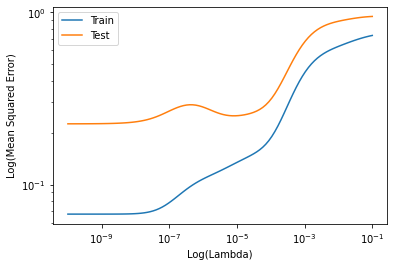

In [27]:
train_errors_alpha = np.zeros((len(Assigned_alpha), n_reps))
test_errors_alpha = np.zeros((len(Assigned_alpha), n_reps))

#Create test dataset
x_test, y_test = make_additive_noise_data(200, f, -0.3, 0.3, random_state=11)

#Fit the model at least time 10 at outer loop 
for i in range(n_reps):
    x_train_rep, y_train_rep = make_additive_noise_data(train_size, f, -0.3, 0.3, random_state=i)
    #Inner loop is the choices of λ
    for d in range(len(Assigned_alpha)):
        model = models[i][d]
        y_train_pred=model.predict(x_train_rep)
        train_errors_alpha[d,i] = mean_squared_error(y_train_rep, y_train_pred)
        y_test_pred=model.predict(x_test)
        test_errors_alpha[d,i] = mean_squared_error(y_test, y_test_pred)

#Calculate mean at axis 1 or Vertical axis
train_errors = np.mean(train_errors_alpha,axis =1 )
test_errors  = np.mean(test_errors_alpha,axis =1 )

# plot results
plt.plot(Assigned_alpha, train_errors, label='Train')
plt.plot(Assigned_alpha, test_errors, label='Test')
#Using the hint to show log of Lambda and MSE
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log(Lambda)')
plt.ylabel('Log(Mean Squared Error)')
plt.xscale('log')
plt.legend()
plt.show()

**Discuss
λ, model complexity, and error rates, corresponding to underfitting and overfitting, by
observing your plot.**.

Refer: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/ and https://www.statology.org/ridge-regression-in-r/


Answer: At the start, λ is very low. It can be seen that the train MSE is very low, and the test MSE is relatively high. It will be overfitted at the λ is low. Ridge regression will prevent the overfitted by increasing λ parameter. In the middle of the graph. Both of MSEs start to converge on each other. It indicates that λ increase will reduce overfitted until it reaches optimal λ. If we still increase the λ after the optimal λ. It can be seen that both MSEs keep increasing. It shows that the model starts to be underfitted because the tradeoff is the model will be less complex if we increase λ beyond optimal and start to underfit.





---



# **Question 6 [Multiclass Perceptron, 5+5+10=20 Marks]**


## I Implement the multiclass perceptron as explained above using the usual template ( init ,fit, and predict). 
In your fit implementation store the history of the weight vectors

In your fit method you have to determine what and how many classes exist based on the
passed target values. One way to do this is via the function numpy.unique.

In [28]:
# Ref https://swayattadaw.medium.com/multiclass-perceptron-from-scratch-ed326fc34b8f and https://www.kaggle.com/code/alizahidraja/multiclass-perceptron/notebook
#Using similar skeleton from activity 3.1
class Perceptron:
    def __init__(self, eta=0.01, tau_max=10000, epsilon=0.005, random_state=None):
        self.eta = eta   # learning rate
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon   # tolerable error
        self.random_state = random_state

    def fit(self, X, y):
        RNG = np.random.default_rng(self.random_state)
        n, p = X.shape

        #Determine what and how many classes exist based on the passed target values
        self.classes_ = np.unique(y)   
        self.n_classes_ = len(self.classes_)

        self.w_trace_ = np.empty((self.tau_max, p, self.n_classes_))# trace of weights during training
        self.xy_idx_trace_ = np.empty(self.tau_max, int) # trace of considered training point indices

        # initialisation of iteration counter and weights
        tau = 0 
        self.w_ = self.w_trace_[0,:,:] = RNG.normal(size=(p, self.n_classes_)) 
        terminate = False

        while not (terminate or (self.predict(X)!=y).mean()<self.epsilon):
            # random order/index to consider training data
            order = RNG.choice(np.arange(n),size = n ,replace = False)
            
            for i in range(n):
                y_i = y[order][i] # true class of the current sample/ Example y_i = 4
                scores = X[order][i].dot(self.w_) #Calculate score 

                if scores[y_i] < np.max(scores):  # If score at the true class less than max scores = Wrong prediction
                    j = np.argmax(scores) #Identify the wrong answer index/class
                    self.w_[:,y_i] = self.w_[:,y_i] + self.eta * X[order][i]  #Increase score for right answer at true class
                    self.w_[:,j] =   self.w_[:,j]   - self.eta * X[order][i]  #Reduce score for wrong answer at wrong index/class

                self.w_trace_[tau+1] = self.w_ #Saving weight of each iteration
                self.xy_idx_trace_[tau] = order[i]  #Saving index of each iteration

                tau +=1 #Increase iteration
                if tau == self.tau_max-1: #break when reach tau_max
                    terminate = True
                    break

        # trim empty rows from traces
        self.w_trace_ = self.w_trace_[:tau] 
        self.xy_idx_trace_ = self.xy_idx_trace_[:tau-1]
        return self

    def predict(self, X):
        scores = X.dot(self.w_)
        y_pred = np.argmax(scores, axis=1)
        return self.classes_[y_pred]

## II Evaluate your algorithm using the digits dataset provided through the function load digits in sklearn.datasets. 
This is a classification problem with 10 classes corresponding to the
digites 0 to 9 (see the scikit-learn online documentation for more information). 

Perform
an 80/20 train/test split and report your train and test error rates for three different learning
rates, η = 0.01, η = 0.1, and η = 0.9 (setting max iterations to 200000 and error tolerance to
0.005). Also report the number of iterations of the inner loops that have been performed in
each case.

In [29]:
from sklearn.datasets import load_digits
#Load digits from sklearn.datasets
digits = load_digits()
#Perform an 80/20 train/test split
x_train, x_test, y_train, y_test = train_test_split_activity(digits.data, digits.target, train_size=0.8, random_state=0)

In [30]:
from sklearn.metrics import zero_one_loss
#Three different learning rates, η = 0.01, η = 0.1, and η = 0.9
etas = [0.01, 0.1, 0.9]

for eta in etas:
    #Setting max iterations to 200000 and error tolerance to 0.005
    perceptron = Perceptron(eta=eta, tau_max=200000, epsilon=0.005, random_state=0)
    perceptron.fit(x_train, y_train)
    train_error = zero_one_loss(perceptron.predict(x_train), y_train)
    test_error = zero_one_loss(perceptron.predict(x_test), y_test)
    #Report the number of iterations of the inner loops that have been performed in each case
    print("Learning Rate:", eta)
    print("Number of iterations:", perceptron.w_trace_.shape[0])
    print("Train Error Rate:", train_error)
    print("Test Error Rate:", test_error,"\n")

Learning Rate: 0.01
Number of iterations: 41702
Train Error Rate: 0.003477051460361591
Test Error Rate: 0.03899721448467963 

Learning Rate: 0.1
Number of iterations: 31636
Train Error Rate: 0.004867872044506227
Test Error Rate: 0.0473537604456824 

Learning Rate: 0.9
Number of iterations: 43140
Train Error Rate: 0.0027816411682892728
Test Error Rate: 0.0473537604456824 



## III Finally, for each learning rate, draw a plot of the training and test error as the number of iterations of the inner loop increases


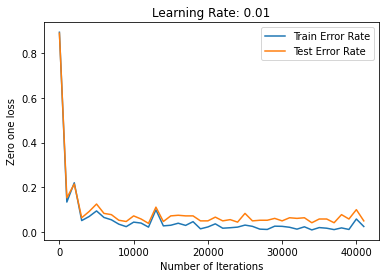

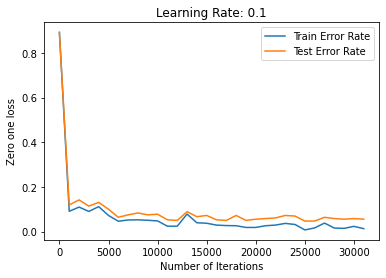

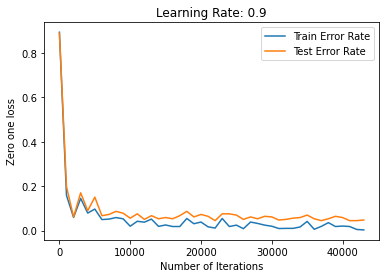

In [31]:
#Using similar skeleton from Activity 3.1
for eta in etas:
    perceptron = Perceptron(eta=eta, tau_max=200000, epsilon=0.005, random_state=0)
    perceptron.fit(x_train, y_train)
    
    train_errors = []
    test_errors = []
    iterations = []
    
    #In each iteration
    for tau, w in enumerate(perceptron.w_trace_):    
       #  tau % 1000 ==  to reduce clutter in plot
        if tau % 1000 == 0:
            iterations.append(tau)
            #Running zero_one_loss test at every w_trace / np.argmax(x_train.dot(w), axis=1) to identify class compare with True class
            #Example [-58.32838097 -57.69471701  -7.84373549 ... -58.26409776   3.63041248 -3.69139518]] argmax is Class 6 but Zero one loss with true class in Y_train or test it might be 6 or other
            train_errors.append(zero_one_loss(np.argmax(x_train.dot(w), axis=1), y_train))
            test_errors.append(zero_one_loss(np.argmax(x_test.dot(w), axis=1), y_test))
            
    plt.plot(iterations, train_errors, label="Train Error Rate")
    plt.plot(iterations, test_errors, label="Test Error Rate")
    plt.title("Learning Rate: " + str(eta))
    plt.xlabel("Number of Iterations")
    plt.ylabel("Zero one loss")
    plt.legend()
    plt.show()

**Explain how the errors behave as the training data
increases and how this is effected by the learning rate. Comment on what setting was the
most efficient**

As training data increases, the error will generally decrease until it stabilizes and is not changed that much. The applicable learning rate will reduce the error and converge faster than the unsuitable rate. 

It can be seen that the best setting for the above graph is a learning rate of 0.1. As it converges on error tolerance much faster at around 30000 iterations. But for other learning rates will converge around 40000 iterations.

The learning rate of 0.1 also reaches one of the lowest error rates, around 6000 iterations faster than the learning rate of 0.01, and 0.9 reach one of the lowest error rates at roughly 10000 iterations.



---



# **Question 7 [Discriminative vs Generative Models, 5+5+5+5=20 Marks]**


## I Load the breast cancer dataset via load breast cancer in sklearn.datasets

Import
LogisticRegression from sklearn.linear model, and copy the code from Activity 3.3 for the Bayes classifier (BC). 

For the Bayes classifier consider the Naive Bayes variant (without shared covariance) as well as the variants with full covariance (shared and not shared).


Perform a training/test split (with train size equal to 0.8)

In [32]:
from sklearn.datasets import load_breast_cancer
#Load the breast cancer dataset via load breast cancer in sklearn.datasets
cancer = load_breast_cancer()
#Perform a training/test split with train size equal to 0.8
x_train, x_test, y_train, y_test = train_test_split_activity(cancer.data, cancer.target, train_size=0.8, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression

#Dont show the warning about ConvergenceWarning: lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
train_error = zero_one_loss(lr.predict(x_train), y_train)
test_error = zero_one_loss(lr.predict(x_test), y_test)
print("Train Error : ",train_error)
print("Test Error : ", test_error)

Train Error :  0.04175824175824172
Test Error :  0.052631578947368474


In [34]:
#Using code from Activity 3.3
from scipy.stats import multivariate_normal
class BayesianClassifier:

    def __init__(self, shared_cov=True, cond_ind=True):
        self.shared_cov=shared_cov
        self.cond_ind=cond_ind

    def fit(self, x, y):
        self.classes_, class_counts = np.unique(y, return_counts=True)
        self.n_ , self.p_ = x.shape
        self.k_ = len(self.classes_)
        self.cond_means_ = np.zeros(shape=(self.k_, self.p_))
        self.cond_covs_ = np.zeros(shape=(self.k_, self.p_, self.p_))
        
        self.class_priors_ = class_counts/len(y)
        for c in range(self.k_):
            c_rows = y==c
            self.cond_means_[c, :] = x[c_rows].mean(axis=0)
            if self.cond_ind:
                np.fill_diagonal(self.cond_covs_[c, :, :], x[c_rows].var(axis=0))
            else:
                self.cond_covs_[c, :, :] = np.cov(x[c_rows].T, bias=True)

        if self.shared_cov:
            shared_cov = np.moveaxis(self.cond_covs_, 0, -1).dot(self.class_priors_)
            # shared_cov = (self.cond_covs_*self.class_priors_).sum(axis=0)
            self.cond_covs_[:] = shared_cov

        return self

    def predict_proba(self, x):
        m, _ = x.shape
        cond_probs = np.zeros(shape=(m, self.k_))
        for c in range(self.k_):
            cond_probs[:, c] = multivariate_normal.pdf(x, self.cond_means_[c], self.cond_covs_[c], allow_singular=True)
        marginal_probs = (cond_probs*self.class_priors_).sum(axis=1)
        probs = np.divide((cond_probs*self.class_priors_).T,
                          marginal_probs,
                          where=marginal_probs>0, out=np.zeros(shape=(self.k_, m))).T
        # probs = ((cond_probs*self.class_priors_).T / marginal_probs).T
        return probs

    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis=1)

    def decision_function(self, x):
        probs = self.predict_proba(x)
        if self.k_ == 2:
            return np.log(probs[:, 1]/probs[:, 0])
        else:
            res = np.zeros(len(x), self.k_)
            for c in range(self.k_):
                res[:, c]=np.log(probs[:, c]/(1-probs[:, c]))
            return res
        
    def generate(self, n, c, random_state=None):
        return multivariate_normal.rvs(self.cond_means_[c], self.cond_covs_[c], size=n, random_state=random_state)

In [35]:
# Train Naive Bayes (shared covariances)
nb_shared = BayesianClassifier(shared_cov=True, cond_ind=True)
nb_shared.fit(x_train, y_train)
train_error = zero_one_loss(nb_shared.predict(x_train), y_train)
test_error = zero_one_loss(nb_shared.predict(x_test), y_test)
print("nb_shared Train Error :",train_error)
print("nb_shared Test Error :",test_error)

# Train Naive Bayes

nb = BayesianClassifier(shared_cov=False, cond_ind=True)
nb.fit(x_train, y_train)

train_error = zero_one_loss(nb.predict(x_train), y_train)
test_error = zero_one_loss(nb.predict(x_test), y_test)
print("nb Train Error :",train_error)
print("nb Test Error :",test_error)

# Train Bayes Classifier (shared covariances)
bc_shared = BayesianClassifier(shared_cov=True, cond_ind=False)
bc_shared.fit(x_train, y_train)

train_error = zero_one_loss(bc_shared.predict(x_train), y_train)
test_error = zero_one_loss(bc_shared.predict(x_test), y_test)
print("bc_shared Train Error :",train_error)
print("bc_shared Test Error :",test_error)

# Train Bayes classifier
bc = BayesianClassifier(shared_cov=False, cond_ind=False)
bc.fit(x_train, y_train)

train_error = zero_one_loss(bc.predict(x_train), y_train)
test_error = zero_one_loss(bc.predict(x_test), y_test)
print("bc Train Error :",train_error)
print("bc Test Error :",test_error)

nb_shared Train Error : 0.06373626373626373
nb_shared Test Error : 0.04385964912280704
nb Train Error : 0.07692307692307687
nb Test Error : 0.04385964912280704
bc_shared Train Error : 0.04395604395604391
bc_shared Test Error : 0.02631578947368418
bc Train Error : 0.05714285714285716
bc Test Error : 0.02631578947368418


## II Implement an experiment where you test the performance for increasing training sizes of N = 5, 10, . . . , 500. For each N sample 10 training sets of the corresponding size, fit all models, and record training and test errors.

In [36]:
#Using sklearn train_test_split instead of train_test_split_activity class
from sklearn.model_selection import train_test_split

n_reps = 10
#Training sizes of N = 5, 10, . . . , 500
N_values = np.arange(5, 505, 5)

#Using similar skeleton from Activity 1.2
train_errors_lr = np.zeros((len(N_values), n_reps))
test_errors_lr = np.zeros((len(N_values), n_reps))

train_errors_nb_shared = np.zeros((len(N_values), n_reps))
test_errors_nb_shared = np.zeros((len(N_values), n_reps))

train_errors_nb = np.zeros((len(N_values), n_reps))
test_errors_nb = np.zeros((len(N_values), n_reps))

train_errors_bc_shared = np.zeros((len(N_values), n_reps))
test_errors_bc_shared = np.zeros((len(N_values), n_reps))

train_errors_bc = np.zeros((len(N_values), n_reps))
test_errors_bc = np.zeros((len(N_values), n_reps))


for i, N in enumerate(N_values):
    for j in range(n_reps):
        x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=N, shuffle=True, random_state=j)
        
        # Logistic Regression
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        train_errors_lr[i, j] = zero_one_loss(lr.predict(x_train), y_train)
        test_errors_lr[i, j] = zero_one_loss(lr.predict(x_test), y_test)

        # Naive Bayes classifier (shared covariance)
        nb_shared = BayesianClassifier(shared_cov=True, cond_ind=True)
        nb_shared.fit(x_train, y_train)
        train_errors_nb_shared[i, j] = zero_one_loss(nb_shared.predict(x_train), y_train)
        test_errors_nb_shared[i, j] = zero_one_loss(nb_shared.predict(x_test), y_test)


        # Naive Bayes classifier (without shared covariance)
        nb = BayesianClassifier(shared_cov=False, cond_ind=True)
        nb.fit(x_train, y_train)
        train_errors_nb[i, j] = zero_one_loss(nb.predict(x_train), y_train)
        test_errors_nb[i, j] = zero_one_loss(nb.predict(x_test), y_test)

        # Bayes classifier (shared covariance)
        bc_shared = BayesianClassifier(shared_cov=True, cond_ind=False)
        bc_shared.fit(x_train, y_train)
        train_errors_bc_shared[i, j] = zero_one_loss(bc_shared.predict(x_train), y_train)
        test_errors_bc_shared[i, j] = zero_one_loss(bc_shared.predict(x_test), y_test)

        
        # Bayes classifier (without shared covariance)
        bc = BayesianClassifier(shared_cov=False, cond_ind=False)
        bc.fit(x_train, y_train)
        train_errors_bc[i, j] = zero_one_loss(bc.predict(x_train), y_train)
        test_errors_bc[i, j] = zero_one_loss(bc.predict(x_test), y_test)      

# Compute mean of errors
mean_train_error_lr = np.mean(train_errors_lr, axis=1)
mean_test_error_lr = np.mean(test_errors_lr, axis=1)
mean_train_error_nb_shared = np.mean(train_errors_nb_shared, axis=1)
mean_test_error_nb_shared = np.mean(test_errors_nb_shared, axis=1)
mean_train_error_nb = np.mean(train_errors_nb, axis=1)
mean_test_error_nb = np.mean(test_errors_nb, axis=1)
mean_train_error_bc_shared = np.mean(train_errors_bc_shared, axis=1)
mean_test_error_bc_shared = np.mean(test_errors_bc_shared, axis=1)
mean_train_error_bc = np.mean(train_errors_bc, axis=1)
mean_test_error_bc = np.mean(test_errors_bc, axis=1)

## III Create suitable plots that compare the mean train and test performances of all models as a function of training size. 

There is no need to include error bars if that makes the plot too
hard to read.

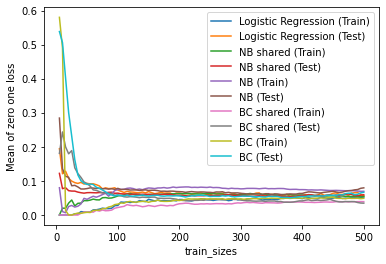

In [37]:
# Plot the results
plt.plot(N_values, mean_train_error_lr, label='Logistic Regression (Train)')
plt.plot(N_values, mean_test_error_lr, label='Logistic Regression (Test)')
plt.plot(N_values, mean_train_error_nb_shared, label='NB shared (Train)')
plt.plot(N_values, mean_test_error_nb_shared, label='NB shared (Test)')
plt.plot(N_values, mean_train_error_nb, label='NB (Train)')
plt.plot(N_values, mean_test_error_nb, label='NB (Test)')
plt.plot(N_values, mean_train_error_bc_shared, label='BC shared (Train)')
plt.plot(N_values, mean_test_error_bc_shared, label='BC shared (Test)')
plt.plot(N_values, mean_train_error_bc, label='BC (Train)')
plt.plot(N_values, mean_test_error_bc, label='BC (Test)')
plt.legend()
plt.xlabel('train_sizes')
plt.ylabel('Mean of zero one loss')
plt.show()

## **IV Formulate answers to the following questions:**
**A** What happens to each classifiers train and test performance when the number of training
data points is increased?

 Answer: Based on the results, it can be seen that increasing the number of training data points has a positive impact on both the train and test performance of the classifiers. Specifically, as the amount of training data increases, the classifiers are able to learn more from the data, resulting in improved performance on both the training and testing sets.

**B Which classifier is best suited when the training set is small, and which is best suited when the training set is big?**

**C Justify your observations by providing some speculations and possible reasons.**

Refer: https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c

https://pomegranate.readthedocs.io/en/latest/NaiveBayes.html



Answer: According to the reference and the above graph. It can be seen that Naive Bayes and Bayes Classifiers are more suitable for a small training set because it decreases both error rates to the optimal point relatively fast and requires less computation compared to Logistic regression.

But when the training data keep increasing. The test error of Naive Bayes and Bayes Classifiers starts to increase. Logistic regression will be the best choice when the training set is big because it is not increasing the both of the error.



---

